In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

O conjunto Iris é bem comportado e balanceado, com 150 amostras divididas igualmente entre 3 classes: Setosa, Versicolor e Virginica.

Ele possui 4 atributos numéricos contínuos (comprimento e largura das sépalas e pétalas), o que o torna ideal para algoritmos baseados em distância como o KNN.

A classe Setosa é facilmente separável das outras duas (como você pode ver em gráficos de dispersão, especialmente com petal.length e petal.width).

Já Versicolor e Virginica têm mais sobreposição, o que pode gerar confusão no modelo.



O KNN tende a performar muito bem nessa base, com acurácias geralmente acima de 95% usando valores razoáveis de k.

O KNN é um algoritmo preguiçoso (lazy learner), ou seja, não treina um modelo, apenas armazena os dados e calcula distâncias na hora da predição. Isso torna o tempo de predição mais custoso com grandes conjuntos de dados.

--------------------------------------------------------------------------------

Valores muito baixos de k (ex: k=1) fazem o modelo memorizar os dados e ficar muito sensível a ruídos (overfitting).

Valores muito altos de k (ex: k=20) fazem o modelo generalizar demais e perder detalhes importantes (underfitting).

Na prática, valores entre 3 e 7 costumam ser ideais para essa base.

--------------------------------------------------------------------------------

Setosa é quase sempre classificada corretamente, independentemente do valor de k.

Os erros do modelo ocorrem quase sempre entre Versicolor e Virginica, que possuem sobreposição de atributos, especialmente em sepal.width.

--------------------------------------------------------------------------------

O KNN é simples, eficaz e fácil de visualizar, mas não escala bem para bases grandes.

In [ ]:
dataframe = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

dataframe.head(10)
# dataframe.info()
# dataframe.shape

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


# Mapa de calor de correlação entre mais de uma variavel

In [ ]:
dataframe_corr = dataframe.drop(columns=['variety'])

<Axes: >

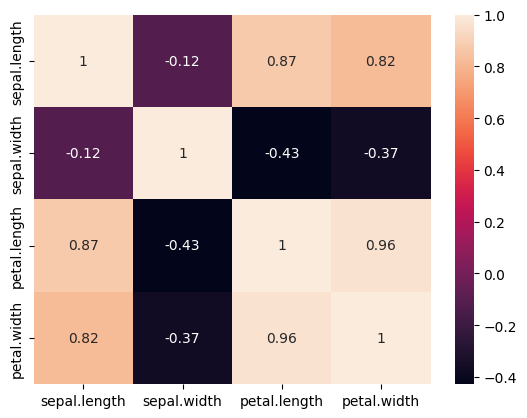

In [ ]:
sns.heatmap(dataframe_corr.corr().round(4), annot=True)

correlação de pearson -> que mede a força e direção de uma relação linear entre duas variáveis numéricas.

Grafico de dispersao entre comprimeiro da sepala com a largura de sepala

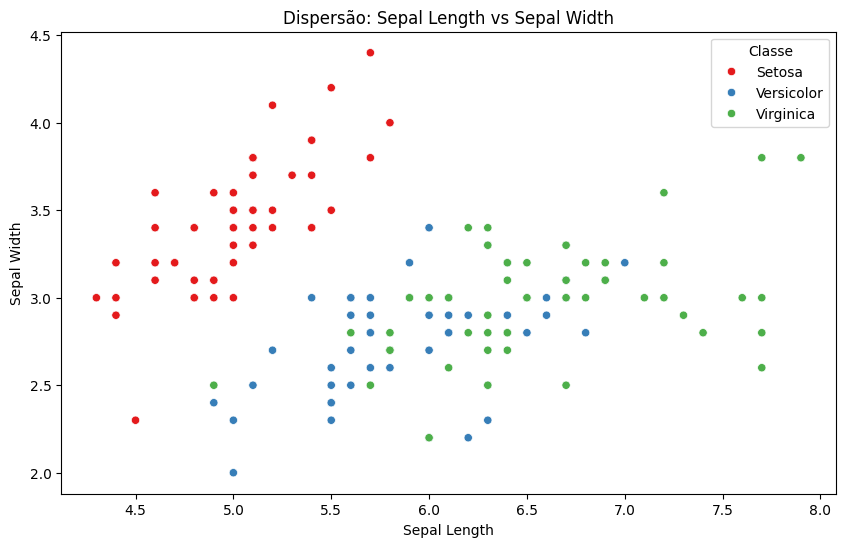

In [ ]:
# Gráfico de dispersão para as duas primeiras features
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dataframe, x='sepal.length', y='sepal.width', hue='variety', palette='Set1')
plt.title('Dispersão: Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title='Classe')
plt.show()

Gráfico de Dispersão Bidimensional (2D Scatter Plot)


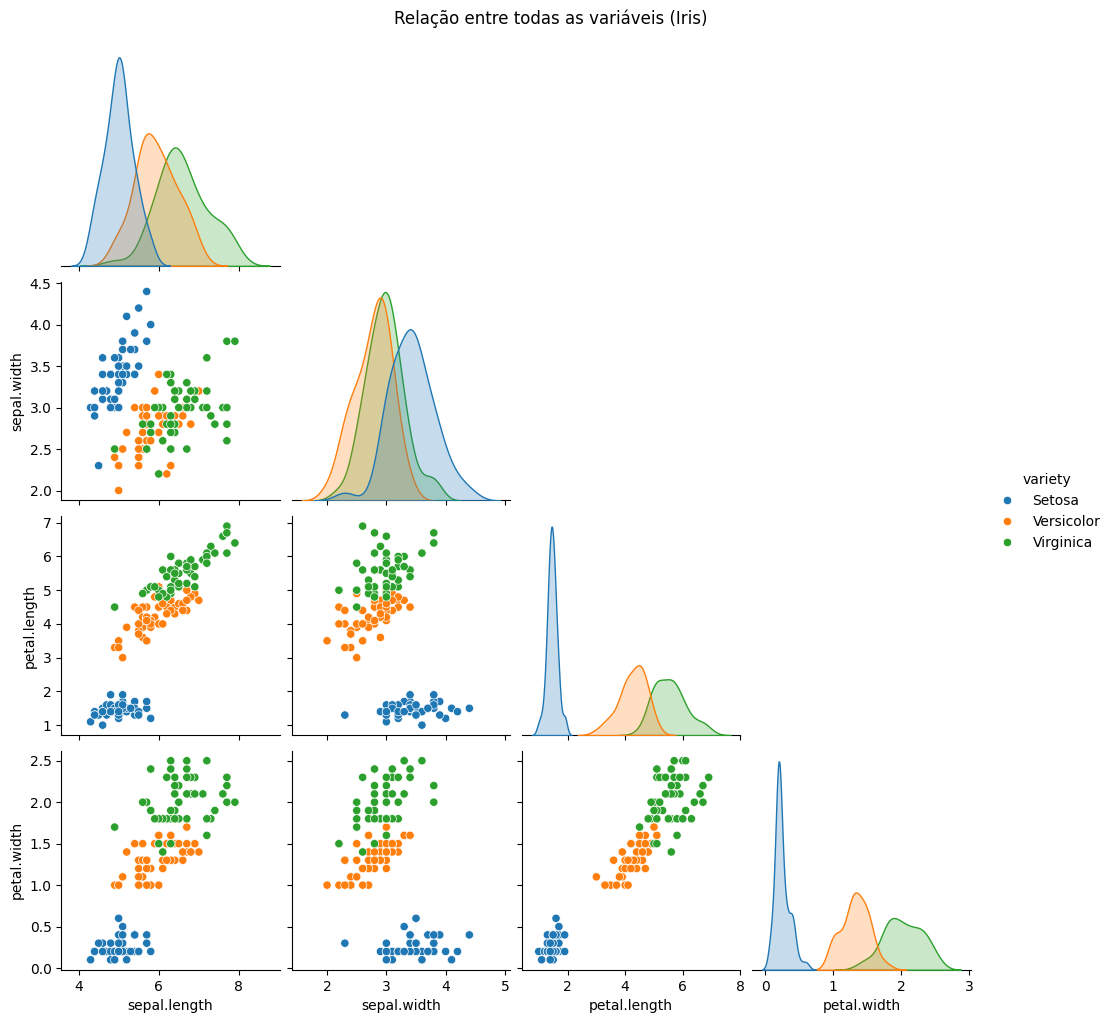

In [ ]:
sns.pairplot(dataframe, hue='variety', corner=True)
plt.suptitle("Relação entre todas as variáveis (Iris)", y=1.02)
plt.show()

Matriz de Dispersão (Pairplot)



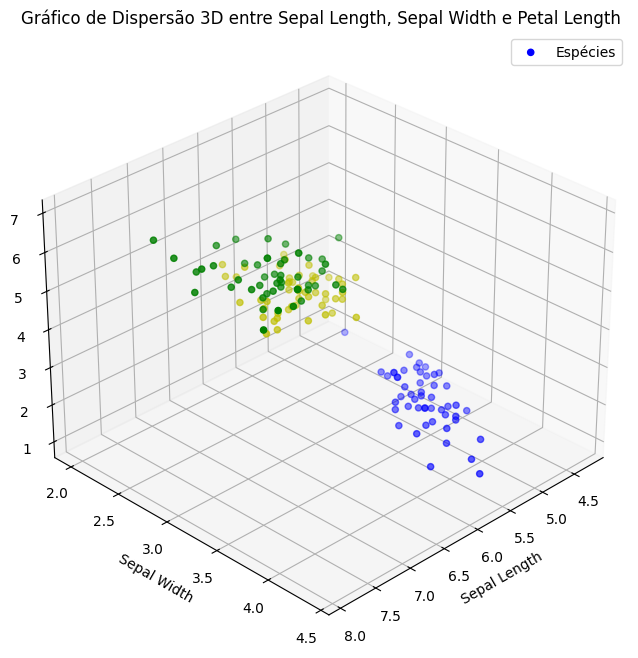

In [ ]:
# Cria a figura
fig = plt.figure(figsize=(10, 8))

# Cria um eixo 3D
ax = fig.add_subplot(111, projection='3d')

# Define as variáveis para o gráfico 3D
x = dataframe['sepal.length']
y = dataframe['sepal.width']
z = dataframe['petal.length']
c = dataframe['variety'].map({'Setosa': 'b', 'Versicolor': 'y', 'Virginica': 'g'})  # Cor das classes

# Plota os pontos
ax.scatter(x, y, z, c=c, label='Espécies', marker='o')

# título e rótulos
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.set_zlabel('Petal Length')
ax.set_title('Gráfico de Dispersão 3D entre Sepal Length, Sepal Width e Petal Length')

# Modificando o angulo de visualização
ax.view_init(elev=30, azim=45)  # Ajuste o elev e azim conforme necessário

# Exibe a legenda
ax.legend()

plt.show()

Gráfico de Dispersão Tridimensional (3D Scatter Plot)



separando rotulos e features para o algoritmo

In [ ]:
#remover classe dos atributos no X
x = dataframe.drop(columns=['variety']).values
#pegar somente a classe no Y
y = dataframe['variety'].values

random_state = None pega aleatoriamente os registros, ja passando um valor começa a pegar em um padrão definido entao a acuracia normalmente fica sempre a mesma ao definir um valor fixo

o train_test_split serve para embaralhar os dados e pegar aleatoriamente

O test_size é a porcentagem que ele vai pegar de teste, e essa porcentagem que ele irá pegar de teste ja sao o restante, os outros 80% sao usados no treinamento

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.20, random_state=951)

In [ ]:
# print("X_train:")
# print(X_train)

# print("\nY_train:")
# print(Y_train)

Parâmetros do KNeighborsClassifier
n_neighbors (Padrão: 5)

O que é: Esse parâmetro define o número de vizinhos a serem considerados na classificação de um ponto.

Impacto:

Valores menores (por exemplo, 1) podem ser mais sensíveis a pontos de ruído, levando a uma maior variabilidade nas previsões.

Valores maiores podem levar a uma classificação mais robusta, mas também podem perder detalhes ao generalizar em excesso.

Como ajustar: Tente testar diferentes valores para n_neighbors, como 3, 5, 7, ou 9, e verifique qual fornece melhor desempenho no seu conjunto de teste. Você pode realizar isso manualmente ou usando validação cruzada.

weights (Padrão: 'uniform')

O que é: Define como os vizinhos são ponderados na decisão final.

'uniform': Todos os vizinhos têm o mesmo peso.

'distance': Os vizinhos mais próximos têm maior peso na decisão.

Impacto:

O uso de 'distance' pode ser útil quando os dados têm diferentes densidades ou quando é importante considerar a proximidade dos vizinhos para determinar a classe.

Como ajustar: Se os dados são bem distribuídos, 'uniform' pode ser suficiente, mas para casos em que você espera que os dados mais próximos tenham maior influência, tente 'distance'.

algorithm (Padrão: 'auto')

O que é: Define o algoritmo usado para encontrar os vizinhos mais próximos.

'auto': O modelo escolhe o melhor algoritmo com base nas características dos dados.

'ball_tree': Uma estrutura de dados eficiente para conjuntos grandes.

'kd_tree': Outro tipo de estrutura eficiente para dados de alta dimensão.

'brute': Busca exaustiva para encontrar vizinhos, o que pode ser mais lento.

Impacto: Dependendo da quantidade de dados e da dimensionalidade, diferentes algoritmos podem ser mais eficientes. Para conjuntos de dados pequenos ou médios, auto pode ser suficiente.

Como ajustar: Se a base de dados for grande, tente ball_tree ou kd_tree para acelerar a busca, mas lembre-se que esses algoritmos podem ser mais sensíveis a características dos dados.

leaf_size (Padrão: 30)

O que é: Esse parâmetro é relevante quando você usa os algoritmos ball_tree ou kd_tree. Ele define o número de pontos por folha na árvore.

Impacto: Um valor maior pode melhorar a velocidade para grandes conjuntos de dados, mas pode tornar a construção da árvore mais lenta. Para dados pequenos, ele pode não ter tanto efeito.

Como ajustar: Teste valores diferentes (ex. 20, 50) para ver se a performance melhora.

p (Padrão: 2)

O que é: Esse parâmetro define a norma de distância utilizada para calcular a proximidade dos vizinhos:

p=1: Distância de Manhattan (somatório das diferenças absolutas).

p=2: Distância Euclidiana (mais comum).

Impacto: A distância Euclidiana (p=2) tende a ser mais útil quando os dados estão em um espaço contínuo. A distância de Manhattan (p=1) pode ser mais eficiente para dados com espaços discretos.

Como ajustar: Normalmente, o valor p=2 (distância Euclidiana) funciona bem para a maioria dos casos, mas você pode tentar usar p=1 para ver se melhora a performance.

metric (Padrão: 'minkowski')

O que é: A métrica de distância usada para calcular a proximidade entre os pontos. A métrica padrão é a de Minkowski, que pode ser ajustada com o valor de p (conforme explicado acima).

Impacto: Para dados muito específicos ou de alta dimensão, mudar a métrica pode influenciar o desempenho.

Como ajustar: Tente usar outras métricas, como 'manhattan', 'euclidean' ou 'chebyshev', dependendo das características dos seus dados.

n_jobs (Padrão: None)

O que é: Define o número de núcleos de CPU a serem usados para o cálculo. None faz o cálculo ser feito no núcleo único. Você pode definir como -1 para usar todos os núcleos disponíveis.

Impacto: Aumenta a performance se você estiver lidando com grandes volumes de dados.

Como ajustar: Se você tiver uma máquina com múltiplos núcleos, pode experimentar definir n_jobs=-1 para acelerar o processo de cálculo.

Como melhorar a acurácia
Ajuste de n_neighbors: Experimente diferentes valores (3, 5, 7, 9) e verifique qual resulta na melhor acurácia. Você pode usar validação cruzada para ajudar nesse processo.

Escolha de weights: Se o padrão uniform não estiver funcionando bem, tente usar distance para dar maior peso aos vizinhos mais próximos.

Tuning de algorithm e leaf_size: Se o seu conjunto de dados for grande ou com alta dimensionalidade, testar ball_tree ou kd_tree pode melhorar a velocidade. Ajustar o valor de leaf_size também pode ter um impacto.

Ajuste de p e metric: Teste outras métricas de distância. Para muitos problemas, a distância Euclidiana funciona bem, mas se os dados tiverem uma estrutura peculiar, você pode tentar outras métricas.

Normalização dos dados: O KNN é sensível à escala dos dados. Se você não estiver fazendo isso já, tente normalizar ou padronizar as features (por exemplo, usando StandardScaler do sklearn.preprocessing).

Validação cruzada: Ao invés de confiar apenas na divisão treino/teste, você pode usar validação cruzada para obter uma estimativa mais robusta do desempenho do modelo.

In [ ]:
model = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform',
                             algorithm='auto',
                             leaf_size=30,
                             p=2,
                             metric='minkowski',
                             metric_params=None,
                             n_jobs=None)

model.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
result = model.predict(X_test)
result

array(['Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Virginica',
       'Setosa', 'Virginica', 'Setosa', 'Virginica', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor', 'Virginica', 'Virginica',
       'Versicolor', 'Versicolor', 'Versicolor', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Virginica', 'Virginica', 'Versicolor',
       'Virginica', 'Virginica', 'Versicolor', 'Virginica', 'Versicolor'],
      dtype=object)

In [ ]:
display(result==Y_test)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [ ]:
total = result.shape[0]
total

30

In [ ]:
verdadeiros = 0

for i in result == Y_test:
  if i == True:
    verdadeiros = verdadeiros+1


print(verdadeiros)

30


In [ ]:
acuracia = verdadeiros/total

acuracia

1.0

In [ ]:
irisMisteriosa = [5.0, 3.6, 1.5, 0.3]

model.predict([irisMisteriosa])

array(['Setosa'], dtype=object)

In [ ]:
print("Acurácia no treino:", model.score(X_train, Y_train))
print("Acurácia no teste:", model.score(X_test, Y_test))

Acurácia no treino: 0.975
Acurácia no teste: 1.0


Se a curva de treino estiver alta e a de teste baixa → overfitting.

Se ambas forem baixas → underfitting.

Ideal: ambas são altas e próximas → bom ajuste.

**20% pra test 40/10 ==> randon = 951**



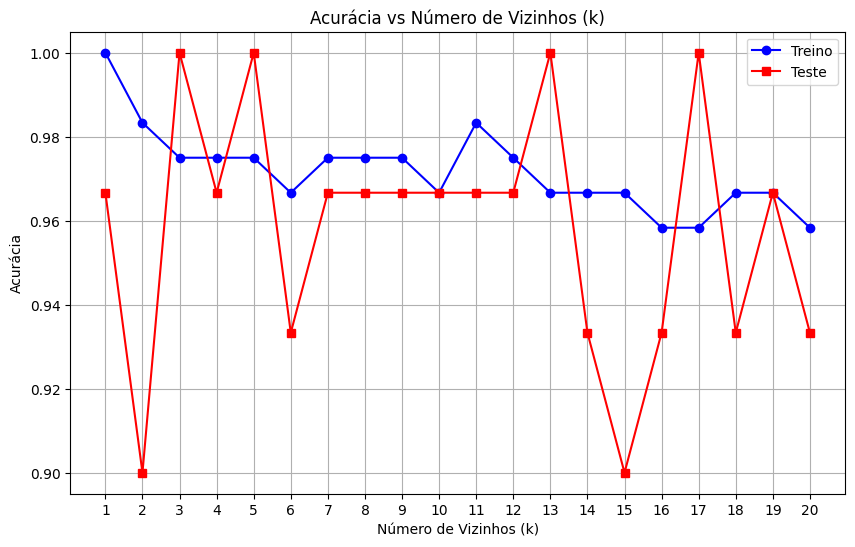

In [ ]:
# Codificar as classes para inteiros
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Separar os dados em treino e teste
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(x, y_encoded, test_size=0.2, random_state=951) # teste size é 30, ou seja 40/10 40/10 40/10

k_values = list(range(1, 21))
train_accuracies = []
test_accuracies = []

for k in k_values:
    model_k = KNeighborsClassifier(n_neighbors=k)
    model_k.fit(X_train_all, Y_train_all)

    train_acc = model_k.score(X_train_all, Y_train_all)
    test_acc = model_k.score(X_test_all, Y_test_all)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Treino', color='blue')
plt.plot(k_values, test_accuracies, marker='s', label='Teste', color='red')
plt.xticks(k_values)
plt.title('Acurácia vs Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

**30% pra test =~33/16 ==> randon = 951**

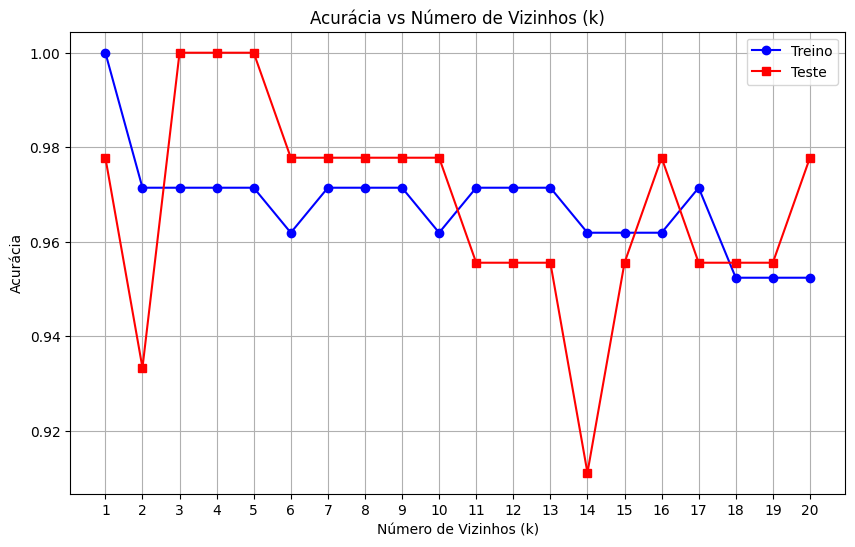

In [ ]:
# Codificar as classes para inteiros
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Separar os dados em treino e teste
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(x, y_encoded, test_size=0.30, random_state=951) # teste size é 50, ou seja =~ 33/16 33/16 33/16

k_values = list(range(1, 21))
train_accuracies = []
test_accuracies = []

for k in k_values:
    model_k = KNeighborsClassifier(n_neighbors=k)
    model_k.fit(X_train_all, Y_train_all)

    train_acc = model_k.score(X_train_all, Y_train_all)
    test_acc = model_k.score(X_test_all, Y_test_all)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Treino', color='blue')
plt.plot(k_values, test_accuracies, marker='s', label='Teste', color='red')
plt.xticks(k_values)
plt.title('Acurácia vs Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

**60% pra test =~20/30 ==> randon = 951**

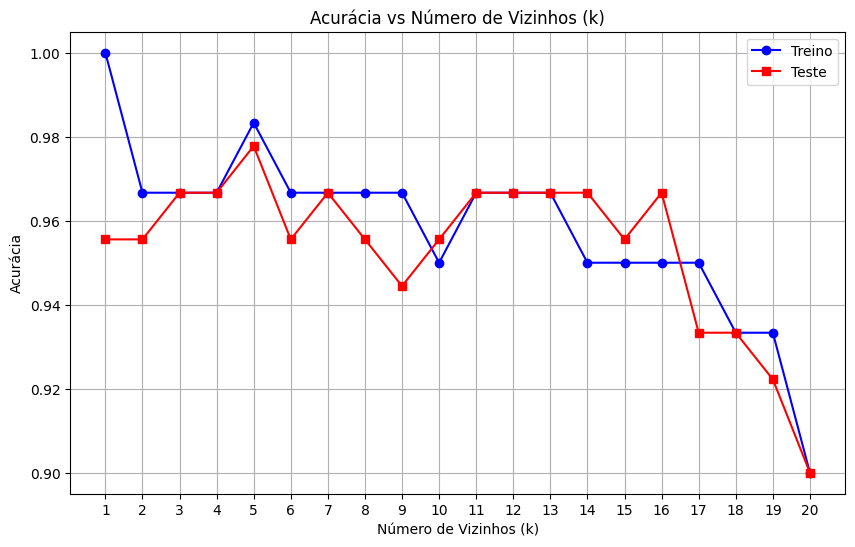

In [ ]:
# Codificar as classes para inteiros
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Separar os dados em treino e teste
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(x, y_encoded, test_size=0.60, random_state=951) # teste size é 90, ou seja =~ 20/30 20/30 20/30

k_values = list(range(1, 21))
train_accuracies = []
test_accuracies = []

for k in k_values:
    model_k = KNeighborsClassifier(n_neighbors=k)
    model_k.fit(X_train_all, Y_train_all)

    train_acc = model_k.score(X_train_all, Y_train_all)
    test_acc = model_k.score(X_test_all, Y_test_all)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Treino', color='blue')
plt.plot(k_values, test_accuracies, marker='s', label='Teste', color='red')
plt.xticks(k_values)
plt.title('Acurácia vs Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

**80% pra test =~10/40 ==> randon = 951**

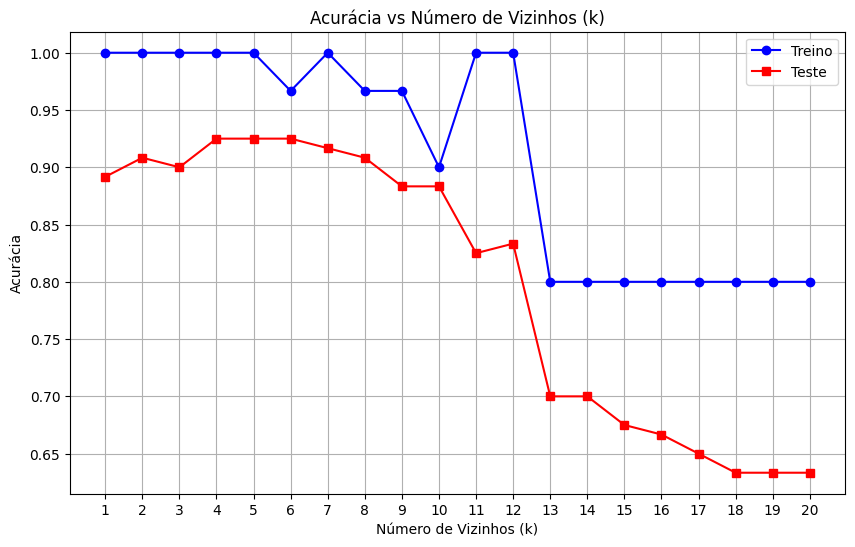

In [ ]:
# Codificar as classes para inteiros
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Separar os dados em treino e teste
X_train_all, X_test_all, Y_train_all, Y_test_all = train_test_split(x, y_encoded, test_size=0.8, random_state=951) # teste size é 80, ou seja =~ 10/40 10/40 10/40

k_values = list(range(1, 21))
train_accuracies = []
test_accuracies = []

for k in k_values:
    model_k = KNeighborsClassifier(n_neighbors=k)
    model_k.fit(X_train_all, Y_train_all)

    train_acc = model_k.score(X_train_all, Y_train_all)
    test_acc = model_k.score(X_test_all, Y_test_all)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', label='Treino', color='blue')
plt.plot(k_values, test_accuracies, marker='s', label='Teste', color='red')
plt.xticks(k_values)
plt.title('Acurácia vs Número de Vizinhos (k)')
plt.xlabel('Número de Vizinhos (k)')
plt.ylabel('Acurácia')
plt.legend()
plt.grid(True)
plt.show()

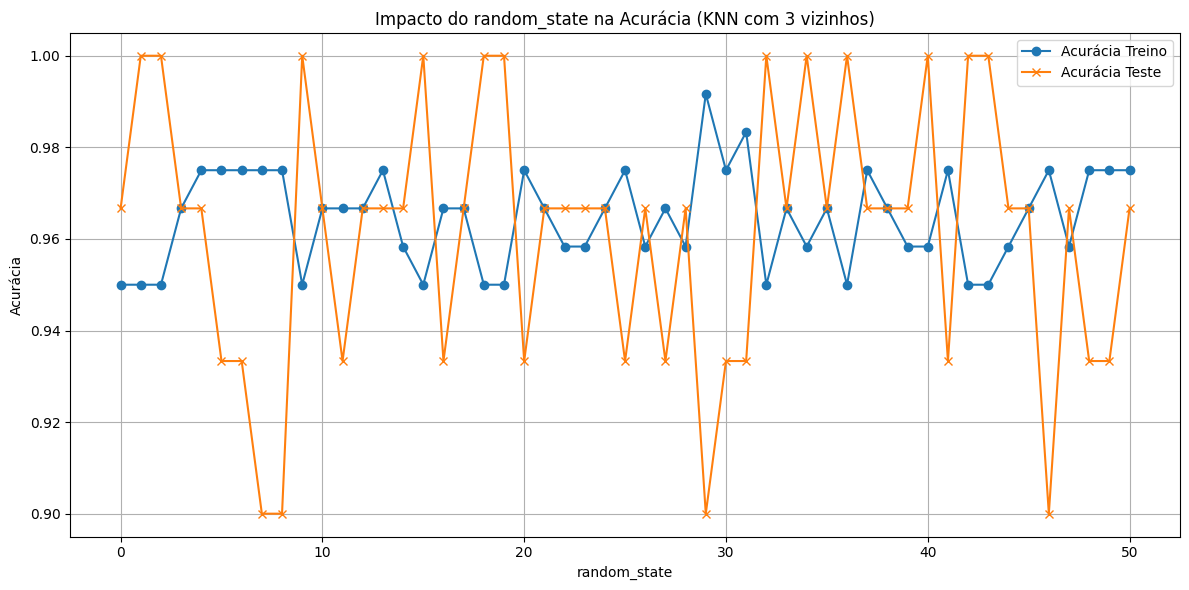

In [ ]:
import numpy as np

states = range(0, 51)  # de 0 a 50
train_accuracies = []
test_accuracies = []

for state in states:
    X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(
        x, y, test_size=0.2, random_state=state
    )

    model_rs = KNeighborsClassifier(n_neighbors=3)
    model_rs.fit(X_train_rs, y_train_rs)

    train_acc = model_rs.score(X_train_rs, y_train_rs)
    test_acc = model_rs.score(X_test_rs, y_test_rs)

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plotando
plt.figure(figsize=(12, 6))
plt.plot(states, train_accuracies, label='Acurácia Treino', marker='o')
plt.plot(states, test_accuracies, label='Acurácia Teste', marker='x')
plt.xlabel('random_state')
plt.ylabel('Acurácia')
plt.title('Impacto do random_state na Acurácia (KNN com 3 vizinhos)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
melhor_state = None
melhor_media = 0
melhor_treino = 0
melhor_teste = 0

for state in range(2000):
    X_train_rs, X_test_rs, y_train_rs, y_test_rs = train_test_split(
        x, y, test_size=0.2, random_state=state
    )

    model_rs = KNeighborsClassifier(n_neighbors=3)
    model_rs.fit(X_train_rs, y_train_rs)

    treino_acc = model_rs.score(X_train_rs, y_train_rs)
    teste_acc = model_rs.score(X_test_rs, y_test_rs)
    media = (treino_acc + teste_acc) / 2

    if media > melhor_media:
        melhor_media = media
        melhor_state = state
        melhor_treino = treino_acc
        melhor_teste = teste_acc

print(f"Melhor random_state: {melhor_state}")
print(f"Acurácia treino: {melhor_treino:.4f}")
print(f"Acurácia teste: {melhor_teste:.4f}")
print(f"Média: {melhor_media:.4f}")


Melhor random_state: 951
Acurácia treino: 0.9750
Acurácia teste: 1.0000
Média: 0.9875


# **Teste melhor que o treino:**

1. Distribuição favorável no teste (sorte)
O train_test_split com determinado random_state pode ter separado os dados de forma que o conjunto de teste ficou mais “fácil” de classificar, com padrões mais claros ou classes mais bem separadas.

Isso pode acontecer por sorte estatística, já que os dados são embaralhados aleatoriamente.

2. Pequeno tamanho do conjunto de teste
Se o test_size é pequeno (ex: 10% ou 20%), então o conjunto de teste pode ter apenas alguns exemplos por classe.

Com menos exemplos, é mais fácil o modelo acertar todos — o que resulta em 100% de acurácia — sem generalizar necessariamente bem.

3. KNN é um modelo baseado em memória (lazy learning)
O KNN não faz generalizações; ele apenas memoriza os dados de treino e usa a distância para tomar decisões.

Portanto, se os pontos de teste estiverem muito próximos dos pontos de treino corretos, ele pode classificar perfeitamente.

4. Variância natural da acurácia
A acurácia é uma métrica global, mas depende muito de como os dados estão distribuídos.

Em algumas divisões, os dados de teste podem estar mais equilibrados ou mais bem distribuídos do que os de treino.

Não necessariamente um teste com 100% pode ser apenas uma ocorrência pontual, especialmente em datasets pequenos como o Iris, que tem apenas 150 amostras. Mas se isso acontecer várias vezes, aí pode ser um sinal de:

Overfitting ao treino;

Um test_size pequeno demais;

Ou que a separação entre as classes está muito evidente.

# -- AQUI PRA BAIXO FAZEMOS SOMENTE COM SETOSA E VIRGINICA




In [ ]:
dataframe_sv = dataframe[dataframe['variety'].isin(['Setosa', 'Virginica'])]

In [ ]:
display(dataframe_sv.head())

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#remover classe dos atributos no X
x_sv = dataframe_sv.drop(columns=['variety']).values
#pegar somente a classe no Y
y_sv = dataframe_sv['variety'].values

In [ ]:
X_train_sv, X_test_sv, Y_train_sv, Y_test_sv = train_test_split(x_sv, y_sv, test_size=0.4, random_state=None)

In [ ]:
# print("X_train:")
# print(X_train_sv)

# print("\nY_train:")
# print(Y_train_sv)

In [ ]:
model_sv = KNeighborsClassifier(n_neighbors=3,
                             weights='uniform',
                             algorithm='auto',
                             leaf_size=30,
                             p=2,
                             metric='minkowski',
                             metric_params=None,
                             n_jobs=None)

model_sv.fit(X_train_sv, Y_train_sv)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
result_sv = model_sv.predict(X_test_sv)
# result_sv

In [ ]:
display(result_sv==Y_test_sv)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [ ]:
total_sv = result_sv.shape[0]
total_sv

40

In [ ]:
verdadeiros_sv = 0

for i in result_sv == Y_test_sv:
  if i == True:
    verdadeiros_sv = verdadeiros_sv+1


print(verdadeiros_sv)

40


In [ ]:
acuracia_sv = verdadeiros_sv/total_sv
acuracia_sv

1.0

In [ ]:
print("Acurácia no treino:", model.score(X_train_sv, Y_train_sv))
print("Acurácia no teste:", model.score(X_test_sv, Y_test_sv))

Acurácia no treino: 1.0
Acurácia no teste: 0.975


# Base de dados nova